In [13]:
import os
import numpy as np
import pandas as pd

# Machine learning algorithms
from sklearn.neural_network import MLPRegressor #Neural network

# Cross-validation
'''
GridSearchCV = Perform an optimization of the parameters. 可以保证在指定的参数范围内找到精度最高的参数
                1. search for the best parameters for model; 
                2. automatically fit a new model on the training dataset w/ the parameters that 
                    can yield the best cross-validation performance.
cross_val_score = to implement cross-validation in scikit-learn.
PS: When an integer is passed to the cv parameter of cross_val_score():
        cv=int (same as cv=StratifiedKFold(n_splits=int)) is used if the estimator is a classifier 
        and y is either binary or multiclass; In all other cases, KFold is used.
        i.e. 写int=10会自动转换为KFold(n_splits=10),不会转换为StratifiedKFold(n_splits=10)。
'''
from sklearn.model_selection import GridSearchCV, cross_val_score

path = os.getcwd()#get current path
path_up1Dir = os.path.dirname(path)#go up one directory
dataset = pd.read_excel(path_up1Dir +'/y_MVPA/y_MVPA.xlsx')#to import the preprocessed dataset into a variable

# print(dataset)

In [14]:
X = pd.DataFrame(dataset.iloc[:,5:10])
y = dataset['aveTotalArea']
other = pd.DataFrame(dataset.iloc[:,:4])
# print(X, y, other)

In [15]:
# Neural Network
'''
Both MLPRegressor and MLPClassifier use parameter alpha for regularization (L2 regularization) term 
    which helps in avoiding overfitting by penalizing weights with large magnitudes.
Finding a reasonable regularization parameter is best done using GridSearchCV, usually in the range 10.0 ** -np.arange(1, 7).
# alpha = L2 penalty (regularization term) parameter.
'''
alpha = 10.0 ** -np.arange(1, 7)

# Set param_grid, aka the main parameters in RandomForestRegressor
param_grid_MLPRegressor = {
    'alpha':alpha
}

# GridSearchCV
mlpr = GridSearchCV(estimator=MLPRegressor(max_iter=10000), # algorithm - Random Forest Regressor
                    param_grid=param_grid_MLPRegressor, # specify the parameters to search over using a dict or list of dictionaries
                    cv=10, # 10-Fold
                    scoring='r2'
                    )

# Build the model, aka training the dataset
mlpr.fit(X, y.values.ravel())

# Output the best parameter, cross-validation score, estimator, and the index of best estimator.
print("\n------------------ MLPRegressor Model")
print("Best parameter: {}".format(mlpr.best_params_))
print("Best score in r2: {:.2f}".format(mlpr.best_score_))
print("Average score in 10-Fold: \n", mlpr.cv_results_['mean_test_score'])
print("Std score in 10-Fold: \n", mlpr.cv_results_['std_test_score'])
print("Best estimator: {}".format(mlpr.best_estimator_))
print("The Index of Best estimator: {}".format(mlpr.best_index_))


------------------ MLPRegressor Model
Best parameter: {'alpha': 1e-05}
Best score in r2: 0.76
Average score in 10-Fold: 
 [0.75200159 0.74902549 0.74535627 0.75442276 0.75506088 0.74148567]
Std score in 10-Fold: 
 [0.07833031 0.07566431 0.07415324 0.07403857 0.07988558 0.07978333]
Best estimator: MLPRegressor(alpha=1e-05, max_iter=10000)
The Index of Best estimator: 4


In [4]:
'''
机器学习不同于统计建模，有些定义不一样。sklearn这个包定义的比较奇怪而已。
https://zhuanlan.zhihu.com/p/369330147，score接近于1越好的是R2这个指标，其他的指标是接近于0越好。把负数去掉即可。
'''
# 10-Fold Cross-validation to check its accuracy again
score = cross_val_score(estimator=MLPRegressor(alpha=0.1, max_iter=10000),
                        X=X, y=y.values.ravel(),
                        cv=10
                       )
print(score)

[-0.14389963 -1.45058069 -0.50802702 -0.26065927 -0.4552932  -0.44834887
 -0.06452469 -0.17604421 -0.02102279 -0.07156033]


In [5]:
# Use the above optimal parameters to build new model, aka training the dataset
mlpr = MLPRegressor(alpha=0.1, max_iter=10000).fit(X, y.values.ravel())

In [6]:
yhat = mlpr.predict(X)
print("Test set predictions:\n {}".format(yhat))

Test set predictions:
 [ 3.11520911e-01  3.15242332e-01  1.72890522e-01 -8.41440782e-02
  3.14558091e-01  2.66285888e-01 -8.61597183e-02 -7.79392035e-02
 -6.36657914e-02 -3.22018359e-01 -3.92529748e-01 -4.06401993e-01
  1.54228286e-01  3.93896987e-01  6.99296908e-01  1.63536095e-01
 -7.70095908e-02 -1.43465232e-01 -6.26716258e-02  1.35896345e+00
 -1.53309045e-03  1.45362120e-01 -5.22394348e-02  2.30639275e-01
 -1.01487029e-01 -2.13040026e-02 -1.11570862e-02 -2.01089152e-01
 -6.04262831e-02 -5.60635471e-02  4.15267539e-01  8.21095190e-02
  5.48735726e-02 -4.29518938e-02 -1.43605190e-01  8.55148158e-02
 -1.68092959e-01 -7.96104741e-02 -6.20441123e-02  6.40724525e-03
 -1.31980663e-01 -4.57843709e-02 -1.41256015e-02 -1.42364758e-01
 -2.82066800e-02 -6.26368960e-02 -6.46124877e-02 -1.86399104e-01
  1.42898578e-02  3.48331283e-01  7.67274792e-01  5.72492941e-02
  5.32314693e-01 -9.94619381e-02  3.81184725e-01  3.48260946e-02
 -2.68783243e-01 -1.95875309e-01 -6.13894207e-02 -1.74398615e-01
  

In [7]:
from sklearn.metrics import mean_squared_error as MSE
MSE(y_true=y, y_pred=yhat)

0.9070544217057062

In [8]:
#调用R2
from sklearn.metrics import r2_score
r2_score(yhat,y)

-19.60304371567539

In [9]:
r2 = mlpr.score(X,y)
r2

0.09294557829429384

In [10]:
r2_score(y_true = y, y_pred = yhat)

0.09294557829429384

In [11]:
cross_val_score(mlpr,X,y.values.ravel(),cv=10,scoring="r2").mean()

-0.36129014963688705

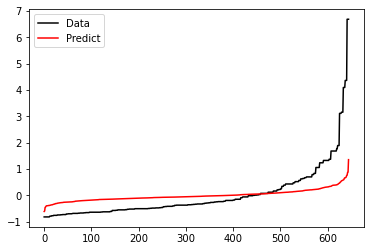

In [12]:
import matplotlib.pyplot as plt
y = dataset['MVPA']
sorted(y)
plt.plot(range(len(y)),sorted(y),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

In [7]:
# Draw the AdaBoost
abr_tree = abr.estimators_[0] # Draw the first tree

# Export a decision tree w/ color in DOT format.
dot_data = tree.export_graphviz(decision_tree=abr_tree, # decision tree classifier
                               filled=True, # True: paint nodes to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output
                               rounded=True, # True: draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman
                               special_characters=True # True: do not ignore special characters for PostScript compatibility
                               )

# Output the graph
graph = graphviz.Source(dot_data)
graph.render(filename='x_TotalArea_y_MVPA_AdaBoost', 
            directory=path_up1Dir +'/x_TotalArea_y_MVPA')

'/Users/zclalala/Documents/GitHub/project-posture/x_TotalArea_y_MVPA/x_TotalArea_y_MVPA_AdaBoost.pdf'